In [547]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 30
pd.options.display.max_rows = 30

from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder
from pandas import DataFrame

In [548]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder
from matplotlib import pyplot as plt 
import seaborn as sns

In [549]:
df = pd.read_pickle('subscribers')
en = pd.read_pickle('engagement')
df.head()
df = df.drop(['num_weekly_services_utilized','preferred_genre','intended_use','weekly_consumption_hour','num_ideal_streaming_services','country','attribution_survey','months_per_bill_period','language','monthly_price','plan_type'],axis=1)
seg = df.drop(['account_creation_date'],axis=1)
seg

,subid,package_type,retarget_TF,age,male_TF,attribution_technical,op_sys,discount_price,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,False,NaN,False,facebook,Android,4.5141,NaN,True,2020-02-08,False,NaN,NaN,True,False,Standard Charter
380374,23383224,base,False,70.0,False,facebook,NaN,4.5141,0.0,False,2020-03-16,False,0.0000,0.3303,False,False,NaN
496617,26844789,enhanced,False,25.0,True,organic,iOS,4.5141,1.0,False,2019-12-22,False,0.0000,0.1101,False,False,NaN
356799,29417030,base,False,30.0,False,search,Android,4.5141,0.0,False,2020-02-11,False,0.0000,0.0367,False,False,NaN
681701,26723159,base,False,28.0,False,discovery,iOS,4.5141,9.0,False,2019-10-20,False,0.0000,0.0367,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,False,38.0,False,facebook,iOS,4.5141,8.0,False,2019-12-02,False,0.0000,0.3303,False,False,NaN
229587,25843074,enhanced,True,49.0,False,google_organic,iOS,4.5141,NaN,True,2019-12-21,False,4.5875,0.3303,True,False,Paypal
281340,24799085,base,False,45.0,False,facebook,iOS,4.5141,31.0,True,2020-01-05,True,0.0000,0.0367,False,False,NaN
87198,21308040,base,False,NaN,False,facebook,iOS,4.5141,NaN,True,2020-02-01,False,NaN,NaN,True,False,Paypal


In [550]:
en = DataFrame(en.groupby('subid').sum())
en = en.drop(['app_opens','cust_service_mssgs','payment_period'],axis=1)
en.reset_index(inplace=True)
en

,subid,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
0,20000062,6.0,23.0,0.0,1.0
1,20000405,13.0,17.0,0.0,1.0
2,20000604,8.0,68.0,0.0,1.0
3,20000685,14.0,165.0,0.0,8.0
4,20000741,2.0,7.0,0.0,0.0
...,...,...,...,...,...
135014,29999740,11.0,31.0,0.0,0.0
135015,29999820,22.0,50.0,0.0,7.0
135016,29999822,2.0,25.0,0.0,1.0
135017,29999889,326.0,326.0,40.0,68.0


In [551]:
seg = pd.merge(seg,en)
seg

,subid,package_type,retarget_TF,age,male_TF,attribution_technical,op_sys,discount_price,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,paid_TF,refund_after_trial_TF,payment_type,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
0,26844789,enhanced,False,25.0,True,organic,iOS,4.5141,1.0,False,2019-12-22,False,0.0000,0.1101,False,False,NaN,13.0,13.0,0.0,1.0
1,29726122,base,False,61.0,False,bing,Android,4.5141,NaN,True,2020-03-05,False,4.5875,0.3303,True,False,Standard Charter,182.0,182.0,6.0,39.0
2,20299962,base,False,23.0,False,email,iOS,4.5141,NaN,True,2020-03-20,False,3.4498,0.0000,True,False,RAKBANK,84.0,206.0,0.0,29.0
3,24930568,base,False,73.0,False,facebook,iOS,4.5141,1.0,False,2020-03-09,False,0.0000,0.6606,False,False,NaN,2.0,13.0,0.0,0.0
4,21361112,enhanced,False,24.0,True,search,iOS,4.5141,6.0,False,2019-12-16,False,0.0000,0.3303,False,False,NaN,2.0,12.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135014,21928274,base,False,NaN,False,facebook,Android,4.5141,NaN,True,2020-01-29,False,NaN,NaN,True,False,RAKBANK,92.0,176.0,3.0,22.0
135015,25549852,enhanced,False,61.0,False,affiliate,Android,4.5141,0.0,False,2020-03-21,False,0.0000,0.3303,False,False,NaN,0.0,6.0,0.0,0.0
135016,25835684,base,False,43.0,False,email,iOS,4.5141,11.0,False,2020-01-16,False,0.0000,0.0000,False,False,NaN,47.0,59.0,0.0,8.0
135017,21434712,enhanced,False,38.0,False,facebook,iOS,4.5141,8.0,False,2019-12-02,False,0.0000,0.3303,False,False,NaN,20.0,36.0,0.0,2.0


In [552]:
seg.describe()

,subid,age,discount_price,creation_until_cancel_days,revenue_net,join_fee,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
count,1.350190e+05,1.123110e+05,135019.000000,85750.000000,112311.000000,112311.000000,135019.000000,135019.000000,135019.000000,135019.000000
mean,2.498882e+07,2.253984e+02,4.514282,16.350915,1.708015,0.114096,52.804724,83.025893,1.112873,12.962583
std,2.889306e+06,3.273229e+04,0.053319,35.959829,3.172083,0.174134,73.647818,89.841463,4.375427,18.600104
min,2.000006e+07,0.000000e+00,1.027600,0.000000,-5.982100,-0.660600,0.000000,0.000000,0.000000,0.000000
25%,2.248572e+07,3.500000e+01,4.514100,3.000000,0.000000,0.036700,7.000000,18.000000,0.000000,0.000000
50%,2.498062e+07,4.600000e+01,4.514100,8.000000,0.000000,0.036700,18.000000,41.000000,0.000000,4.000000
75%,2.749941e+07,5.600000e+01,4.514100,13.000000,3.670000,0.110100,62.000000,142.000000,0.000000,17.000000
max,2.999994e+07,8.061990e+06,5.027900,312.000000,15.634200,0.734000,411.000000,628.000000,158.000000,98.000000


In [553]:
seg.value_counts('package_type')
cp = seg.drop(['attribution_technical','retarget_TF','creation_until_cancel_days','discount_price','cancel_before_trial_end','trial_end_date','initial_credit_card_declined','join_fee','paid_TF','refund_after_trial_TF','payment_type'],axis=1)
cp['op_sys'].fillna(value = 'other',inplace = True)
cp['package_type'].fillna(value = 'other',inplace = True)
cp1 = cp[cp.isnull().sum(axis=1) < 1]

In [554]:
cp1
cp1 = cp1[cp1['age'].between(14, 80)]

#cp1 = cp1.replace({'attribution_technical': {'brand sem intent google': 'brand sem intent',
#'brand sem intent bing': 'brand sem intent', 
#'facebook_organic': 'organic',
#'google_organic': 'organic',
#'pinterest_organic': 'organic', 
#'bing_organic': 'organic',
#'email_blast': 'email',
##'brand sem intent':'search'}})

#cp1 = cp1.replace(['discovery', 'bing','display', 'internal', 'other', 'youtube','podcast', 'vod', 'samsung', 'ott','direct_mail', 'quora', 'appstore', 'criteo', 'content_greatist','influencer', 'twitter', 'playstore', 'tv'] ,'other')

#cp1.attribution_technical.unique()
##a = DataFrame(cp1.value_counts('attribution_technical'))
pd.set_option('display.max_rows', 1000)
#display(cp1)

In [555]:
cp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111684 entries, 0 to 135018
Data columns (total 10 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   subid                            111684 non-null  int64  
 1   package_type                     111684 non-null  object 
 2   age                              111684 non-null  float64
 3   male_TF                          111684 non-null  object 
 4   op_sys                           111684 non-null  object 
 5   revenue_net                      111684 non-null  float64
 6   num_videos_completed             111684 non-null  float64
 7   num_videos_more_than_30_seconds  111684 non-null  float64
 8   num_videos_rated                 111684 non-null  float64
 9   num_series_started               111684 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 9.4+ MB


In [556]:
cp1 = pd.get_dummies(cp1)
cp1 = cp1.drop('subid',axis=1)
cp1

,age,revenue_net,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,package_type_base,package_type_economy,package_type_enhanced,package_type_other,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS,op_sys_other
0,25.0,0.0000,13.0,13.0,0.0,1.0,0,0,1,0,0,1,0,1,0
1,61.0,4.5875,182.0,182.0,6.0,39.0,1,0,0,0,1,0,1,0,0
2,23.0,3.4498,84.0,206.0,0.0,29.0,1,0,0,0,1,0,0,1,0
3,73.0,0.0000,2.0,13.0,0.0,0.0,1,0,0,0,1,0,0,1,0
4,24.0,0.0000,2.0,12.0,0.0,0.0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135013,32.0,0.0000,12.0,13.0,0.0,1.0,1,0,0,0,1,0,1,0,0
135015,61.0,0.0000,0.0,6.0,0.0,0.0,0,0,1,0,1,0,1,0,0
135016,43.0,0.0000,47.0,59.0,0.0,8.0,1,0,0,0,1,0,0,1,0
135017,38.0,0.0000,20.0,36.0,0.0,2.0,0,0,1,0,1,0,0,1,0


In [557]:
scaler = MinMaxScaler()
data_min_max_norm = scaler.fit_transform(cp1)
data_min_max_norm =DataFrame(data_min_max_norm,columns=[list(cp1.columns)])
#data_min_max_norm = data_min_max_norm.drop('subid',axis=1)

In [558]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(cp1.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,10),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,10,1))
plt.ylabel("WCSS")
plt.show()


KeyboardInterrupt: 

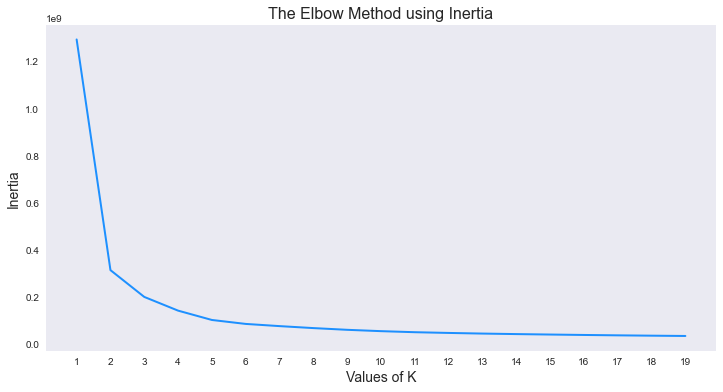

In [ ]:
inertias = []
K=range(1, 20)

for k in K: 
    kmeanModel = KMeans(n_clusters=k,
                        max_iter=400,
                        n_init=20).fit(cp1) 
    kmeanModel.fit(cp1)
    inertias.append(kmeanModel.inertia_)
    


# Plot inertias
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(K, inertias, 'bx-', linewidth=2, color='dodgerblue') 
plt.xlabel('Values of K', fontsize=14) 
plt.ylabel('Inertia', fontsize=14) 
plt.title('The Elbow Method using Inertia', fontsize=16) 
plt.xticks(np.arange(1, 20))
plt.show()

In [ ]:
# Build k-means clustering model
kmeans = KMeans(n_clusters=4,
                max_iter=400,
                n_init=20).fit(data_min_max_norm)

# Get centres of the clusters
cluster_centres = kmeans.cluster_centers_
df_cluster_centres = pd.DataFrame(cluster_centres, columns=[list(cp1.columns)])
df_cluster_centres['Cluster'] = df_cluster_centres.index

# Mark each customer with its cluster
df_four_clusters = data_min_max_norm.copy(deep=True)
df_four_clusters['Cluster'] = kmeans.labels_

df_four_clusters['Cluster'].value_counts()
df_four_clusters.head()
df_cluster_centres.head()

,age,revenue_net,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,package_type_base,package_type_economy,package_type_enhanced,package_type_other,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS,op_sys_other,Cluster
0,0.458571,0.335095,0.090305,0.096698,0.003027,0.090360,1.000000e+00,-2.636780e-16,-1.770806e-14,1.770806e-14,0.884064,0.115936,-2.392531e-14,9.999677e-01,3.231227e-05,0
1,0.455817,0.352390,0.108076,0.107420,0.008444,0.104359,4.513527e-01,8.319890e-02,2.431703e-01,2.222781e-01,0.878825,0.121175,9.999736e-01,-2.153833e-14,2.644593e-05,1
2,0.386723,0.334375,0.078143,0.086607,0.002028,0.076934,3.774758e-15,2.622902e-15,1.000000e+00,2.109424e-15,0.860805,0.139195,9.436896e-16,1.000000e+00,-2.127747e-18,2
3,0.471529,0.410008,0.143599,0.149839,0.006660,0.153362,-3.330669e-15,2.307277e-01,-9.880985e-15,7.692723e-01,0.904167,0.095833,9.436896e-16,9.998652e-01,1.348496e-04,3


## Attribution and Allocation

In [ ]:
sub = pd.read_pickle('subscribers')
at = sub[['attribution_technical','attribution_survey','account_creation_date','revenue_net']]
at.head()
display(at['account_creation_date'].max(),at['account_creation_date'].min())
at = at[at['account_creation_date']>= '2019-07-01']

Timestamp('2020-03-27 23:59:06')

Timestamp('2019-06-30 00:00:19')

In [ ]:
sp = pd.read_excel(r'advertising_spend_data.xlsx',sheet_name='Spend for students')
sp.columns = sp.iloc[1]
channel = list(sp.iloc[1])
channel.pop(0)
sp = sp.iloc[2:]
sp

1,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
2,2019-06-30 00:00:00,84800,75000,17300,21400,11900,10500,5900,6100
3,2019-07-31 00:00:00,60000,75600,17300,21300,12000,29800,6000,6600
4,2019-08-31 00:00:00,52300,76100,18100,21300,16300,65900,6200,6800
5,2019-09-30 00:00:00,49000,75800,18900,21300,16400,73700,6000,7400
6,2019-10-31 00:00:00,51300,76000,21000,21400,12200,32300,6700,7300
7,2019-11-30 00:00:00,56100,75900,21400,21600,11700,9800,6300,7300
8,2019-12-31 00:00:00,51400,76100,32100,22200,12100,3500,7200,8000
9,2020-01-31 00:00:00,49000,75500,33600,22700,14300,300,6700,7400
10,2020-02-29 00:00:00,49700,76600,30100,21700,15000,300,6400,6500
11,2020-03-31 00:00:00,49100,78000,22700,21200,17600,300,5900,10000


In [ ]:
at['month_year'] = at['account_creation_date'].dt.to_period('M')
at

,attribution_technical,attribution_survey,account_creation_date,revenue_net,month_year
162502,facebook,facebook,2020-01-24 21:44:16,NaN,2020-01
380374,facebook,facebook,2020-03-01 15:44:35,0.0000,2020-03
496617,organic,facebook,2019-12-07 16:37:06,0.0000,2019-12
356799,search,tv,2020-01-27 16:09:32,0.0000,2020-01
681701,discovery,youtube,2019-10-05 12:57:07,0.0000,2019-10
...,...,...,...,...,...
509326,facebook,facebook_organic,2019-11-17 14:12:33,0.0000,2019-11
229587,google_organic,referral,2019-12-06 18:02:13,4.5875,2019-12
281340,facebook,facebook,2019-12-21 19:40:44,0.0000,2019-12
87198,facebook,facebook,2020-01-17 23:58:51,NaN,2020-01


In [ ]:
at.value_counts(['attribution_technical','attribution_survey'])

attribution_technical    attribution_survey
facebook                 facebook              63787
email                    facebook              13570
search                   facebook               8118
organic                  tv                     8084
brand sem intent google  facebook               6380
organic                  facebook               6120
search                   tv                     5984
brand sem intent google  tv                     5780
facebook                 tv                     5643
email                    tv                     4422
email_blast              facebook               4183
referral                 referral               4088
search                   search                 4075
affiliate                facebook               3740
pinterest                pinterest              3583
google_organic           facebook               3446
                         tv                     3027
facebook                 referral               2940
fa

In [ ]:
at.value_counts('attribution_survey')


attribution_survey
facebook            117507
tv                   39267
referral             20758
search                8437
pinterest             7796
other                 6440
public_radio          6211
social_organic        3827
youtube               3105
podcast               2993
affiliate             1946
ott                   1443
sirius xm             1122
facebook_organic       765
direct_mail            406
amfm_radio             337
dtype: int64

In [ ]:
#cutomers count
at1 = at.drop(['attribution_survey','account_creation_date'],axis=1)
at1 = at1[at1['attribution_technical'].isin(channel)]

at2 = DataFrame(at1.groupby(['month_year','attribution_technical']).size().unstack())
at2 = at2.reset_index(drop=1)
names = at2.columns.to_list()
at2


attribution_technical,affiliate,brand sem intent google,email,email_blast,facebook,pinterest,referral,search
0,839,2090,3260,1510,10011,793,528,1328
1,1903,1895,3092,1902,9855,637,521,1939
2,1065,1530,2420,1582,6129,517,582,1852
3,760,1602,2305,977,9489,682,529,2333
4,509,2030,2584,629,12995,594,587,2510
5,565,2443,2677,411,9288,851,666,3770
6,1074,2626,2368,35,6289,819,584,4073
7,1480,2346,3168,66,7988,680,583,4300
8,1621,1765,3507,56,6889,455,568,3093


In [ ]:
at3 = DataFrame(at1.groupby(['month_year','attribution_technical']).sum().unstack())
at3 = at3.reset_index(drop=1)
at3.columns = names
at3

,affiliate,brand sem intent google,email,email_blast,facebook,pinterest,referral,search
0,2303.3287,5706.0426,9507.7589,3761.5298,24153.0407,1593.1470,1556.9975,2789.8973
1,2069.9167,4370.0525,5282.8182,3448.6623,11116.3566,1279.9492,1160.3439,3125.7390
2,1765.0865,3007.9320,2896.4374,2690.3669,3598.8754,711.8699,843.8798,2225.0476
3,697.3000,2677.4852,2703.0284,1570.1361,5137.1926,914.9677,791.6190,2692.8258
4,575.3459,3358.5638,2785.4566,1076.2642,7650.2618,972.4766,975.5961,2979.4161
5,1068.6673,3706.8835,2907.1171,579.7132,4745.6403,1187.7588,1029.5818,4324.6546
6,1485.5059,3848.6189,2505.1420,64.1516,3036.8883,1058.1711,825.2729,4609.1163
7,1497.7270,2702.3311,2762.8127,77.6205,3943.4150,841.7145,568.5197,3847.2610
8,1814.9618,1885.5359,2800.1733,80.2996,3237.6740,521.3235,603.0544,2758.8858


In [ ]:
sp = sp.reset_index(drop=1)
sp

1,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,2019-06-30 00:00:00,84800,75000,17300,21400,11900,10500,5900,6100
1,2019-07-31 00:00:00,60000,75600,17300,21300,12000,29800,6000,6600
2,2019-08-31 00:00:00,52300,76100,18100,21300,16300,65900,6200,6800
3,2019-09-30 00:00:00,49000,75800,18900,21300,16400,73700,6000,7400
4,2019-10-31 00:00:00,51300,76000,21000,21400,12200,32300,6700,7300
5,2019-11-30 00:00:00,56100,75900,21400,21600,11700,9800,6300,7300
6,2019-12-31 00:00:00,51400,76100,32100,22200,12100,3500,7200,8000
7,2020-01-31 00:00:00,49000,75500,33600,22700,14300,300,6700,7400
8,2020-02-29 00:00:00,49700,76600,30100,21700,15000,300,6400,6500
9,2020-03-31 00:00:00,49100,78000,22700,21200,17600,300,5900,10000


In [ ]:
cac = {}
for i in channel:
    cac[i] = sp[i]/at2[i]
cac = pd.DataFrame(cac)
cac = cac[~cac['facebook'].isnull()]
cac= cac.reset_index(drop=1)
cac

,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,8.470682,23.006135,13.027108,10.239234,14.183552,6.953642,7.440101,11.55303
1,6.08828,24.450194,8.922125,11.240106,6.305833,15.667718,9.419152,12.667946
2,8.533203,31.446281,9.773218,13.921569,15.305164,41.656131,11.992263,11.683849
3,5.163874,32.885033,8.101157,13.29588,21.578947,75.435005,8.797654,13.988658
4,3.947672,29.411765,8.366534,10.541872,23.968566,51.351351,11.279461,12.436116
5,6.040052,28.352634,5.676393,8.841588,20.707965,23.844282,7.403055,10.960961
6,8.173,32.136824,7.881169,8.453922,11.266294,100.0,8.791209,13.69863
7,6.134201,23.832071,7.813953,9.676044,9.662162,4.545455,9.852941,12.692967
8,7.2144,21.84203,9.731652,12.294618,9.253547,5.357143,14.065934,11.443662


In [ ]:
clv = {}
for i in channel:
    clv[i] = at3[i]/at2[i]-cac[i]
clv = pd.DataFrame(clv)
clv = clv[~clv['facebook'].isnull()]
clv= clv.reset_index(drop=1)
clv

,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,-6.058032,-20.089645,-10.926282,-7.509071,-11.438226,-4.462563,-5.431088,-8.604171
1,-4.960289,-22.74165,-7.310088,-8.934009,-5.21812,-13.854541,-7.409813,-10.440799
2,-7.946015,-30.249406,-8.571789,-11.9556,-13.647806,-39.95552,-10.615339,-10.233884
3,-4.62249,-31.712352,-6.946924,-11.624541,-20.661447,-73.827906,-7.456059,-12.492214
4,-3.358964,-28.333802,-7.179515,-8.887407,-22.83822,-49.640279,-9.642295,-10.774112
5,-5.529108,-27.266673,-4.529269,-7.324239,-18.816518,-22.433788,-6.007334,-9.415042
6,-7.690112,-31.07891,-6.749542,-6.98834,-9.883142,-98.167097,-7.499181,-12.285492
7,-5.640534,-22.959971,-6.919242,-8.524156,-8.650184,-3.369386,-8.615126,-11.717805
8,-6.744422,-21.043578,-8.839675,-11.226325,-8.133892,-3.923221,-12.920168,-10.381946


## chrun

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
import copy
import math

pd.options.display.max_columns = 25

In [ ]:
# ------ DEFINE FUNCTIONS -----
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact


In [ ]:
def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives


In [576]:
df = pd.read_pickle('subscribers')
df = df.drop(['attribution_technical','cancel_before_trial_end','trial_end_date','initial_credit_card_declined','revenue_net','join_fee','paid_TF','refund_after_trial_TF','payment_type','monthly_price','account_creation_date','num_weekly_services_utilized','preferred_genre','intended_use','weekly_consumption_hour','num_ideal_streaming_services','country','attribution_survey','months_per_bill_period','language','plan_type'],axis=1)
display(df)
df['creation_until_cancel_days'].describe()


,subid,package_type,retarget_TF,age,male_TF,op_sys,discount_price,creation_until_cancel_days
162502,21724479,economy,False,NaN,False,Android,4.5141,NaN
380374,23383224,base,False,70.0,False,NaN,4.5141,0.0
496617,26844789,enhanced,False,25.0,True,iOS,4.5141,1.0
356799,29417030,base,False,30.0,False,Android,4.5141,0.0
681701,26723159,base,False,28.0,False,iOS,4.5141,9.0
...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,False,38.0,False,iOS,4.5141,8.0
229587,25843074,enhanced,True,49.0,False,iOS,4.5141,NaN
281340,24799085,base,False,45.0,False,iOS,4.5141,31.0
87198,21308040,base,False,NaN,False,iOS,4.5141,NaN


count    151768.000000
mean         16.570832
std          35.777986
min        -108.000000
25%           2.000000
50%           8.000000
75%          13.000000
max         312.000000
Name: creation_until_cancel_days, dtype: float64

In [577]:
df = pd.merge(df,en)
df = df.drop('subid',axis=1)

In [578]:
df['creation_until_cancel_days'].fillna(value='100',inplace=True)
df['op_sys'].fillna(value = 'other',inplace = True)
df['package_type'].fillna(value = 'other',inplace = True)
df = df[df['age'].between(14, 80)]
df = df[~df['male_TF'].isnull()]

df

,package_type,retarget_TF,age,male_TF,op_sys,discount_price,creation_until_cancel_days,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
0,enhanced,False,25.0,True,iOS,4.5141,1.0,13.0,13.0,0.0,1.0
1,base,False,61.0,False,Android,4.5141,100,182.0,182.0,6.0,39.0
2,base,False,23.0,False,iOS,4.5141,100,84.0,206.0,0.0,29.0
3,base,False,73.0,False,iOS,4.5141,1.0,2.0,13.0,0.0,0.0
4,enhanced,False,24.0,True,iOS,4.5141,6.0,2.0,12.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
135013,base,False,32.0,False,Android,4.5141,1.0,12.0,13.0,0.0,1.0
135015,enhanced,False,61.0,False,Android,4.5141,0.0,0.0,6.0,0.0,0.0
135016,base,False,43.0,False,iOS,4.5141,11.0,47.0,59.0,0.0,8.0
135017,enhanced,False,38.0,False,iOS,4.5141,8.0,20.0,36.0,0.0,2.0


In [579]:
df['churn_TF'] = df.apply(lambda y: 0 if int(y.creation_until_cancel_days) >14 else 1, axis=1)

In [580]:

df.churn_TF.describe()
df = df.drop('creation_until_cancel_days',axis=1)
df = pd.get_dummies(df)
df


,retarget_TF,age,discount_price,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,churn_TF,package_type_base,package_type_economy,package_type_enhanced,package_type_other,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS,op_sys_other
0,False,25.0,4.5141,13.0,13.0,0.0,1.0,1,0,0,1,0,0,1,0,1,0
1,False,61.0,4.5141,182.0,182.0,6.0,39.0,0,1,0,0,0,1,0,1,0,0
2,False,23.0,4.5141,84.0,206.0,0.0,29.0,0,1,0,0,0,1,0,0,1,0
3,False,73.0,4.5141,2.0,13.0,0.0,0.0,1,1,0,0,0,1,0,0,1,0
4,False,24.0,4.5141,2.0,12.0,0.0,0.0,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135013,False,32.0,4.5141,12.0,13.0,0.0,1.0,1,1,0,0,0,1,0,1,0,0
135015,False,61.0,4.5141,0.0,6.0,0.0,0.0,1,0,0,1,0,1,0,1,0,0
135016,False,43.0,4.5141,47.0,59.0,0.0,8.0,1,1,0,0,0,1,0,0,1,0
135017,False,38.0,4.5141,20.0,36.0,0.0,2.0,1,0,0,1,0,1,0,0,1,0


In [599]:
df.value_counts('discount_price')

discount_price
4.5141    77954
5.0279      184
1.0276       22
4.0737        7
4.2205        7
3.7801        2
4.3673        1
4.4407        1
dtype: int64

In [581]:
df.value_counts('churn_TF')

churn_TF
1    72104
0    39580
dtype: int64

In [582]:
df_train, df_test = model_selection.train_test_split(df, test_size=0.3)
df = df_train.astype(float)
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['retarget_TF', 'age', 'discount_price', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started', 'churn_TF', 'package_type_base',
       'package_type_economy', 'package_type_enhanced', 'package_type_other',
       'male_TF_False', 'male_TF_True', 'op_sys_Android', 'op_sys_iOS',
       'op_sys_other'],
      dtype='object')>

In [603]:
y_col_name = 'churn_TF' # specify which column contains outcome variable y. Needs to be coded as binary True/False or 0/1
x_col_name = ['age', 'discount_price',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started',
       'package_type_base', 'package_type_economy', 'package_type_enhanced',
       'package_type_other','op_sys_Android', 'op_sys_iOS', 'op_sys_other']    # list of x covariates
add_constant_TF = True

In [604]:
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

In [605]:
# --- fit logistic regression
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.342174
         Iterations 22

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:                78178
Model:                          Logit   Df Residuals:                    78166
Method:                           MLE   Df Model:                           11
Date:                Thu, 16 Dec 2021   Pseudo R-squ.:                  0.4740
Time:                        05:58:07   Log-Likelihood:                -26750.
converged:                       True   LL-Null:                       -50852.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
age                             

In [606]:
# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     5891.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        05:58:07   Log-Likelihood:                -29703.
No. Observations:               78178   AIC:                         5.943e+04
Df Residuals:                   78166   BIC:                         5.954e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [607]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])


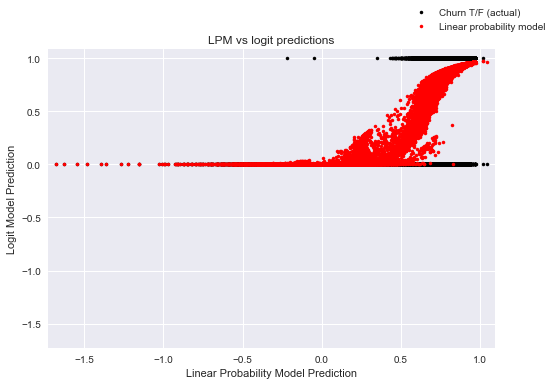

In [608]:
# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']], df_test[['churn_TF']], 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

In [609]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_lpm'])


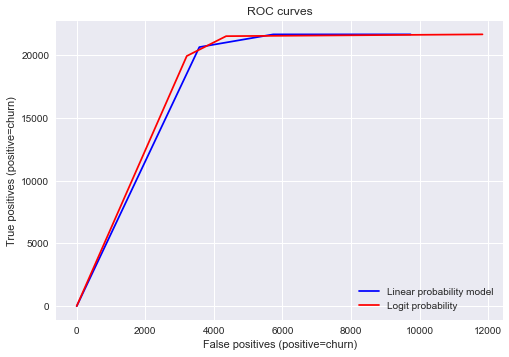

In [610]:
# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [635]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
discount_amount = 0.4
acceptance_rate_churn = discount_amount
threshold = 0.5
base_price = 4.5141
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [636]:
# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

In [637]:
# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)


In [638]:
# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind


In [639]:
# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind


In [640]:
# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind


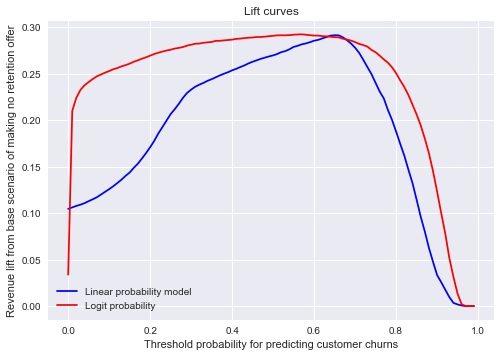

In [641]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])


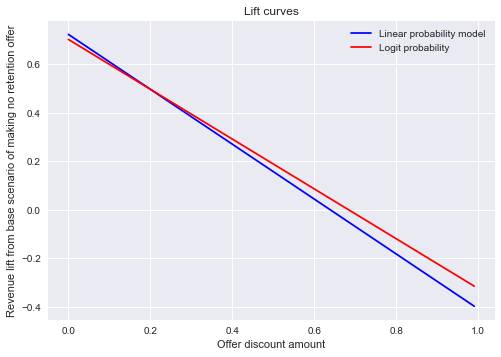

In [642]:
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])